In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\konde\Music\projects\Sentiment Analyzer\IMDB-Dataset.csv")

In [3]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'couldn', 'me', 'ma', 'for', 'the', 'doesn', 'how', 'are', 'weren', 'had', "she's", "hasn't", "weren't", 'from', 'their', 'whom', 'those', 'myself', 'down', 'our', 'more', 'most', 'shan', 'yourselves', 'theirs', 'having', 'of', 'further', 'mustn', 'then', 'off', 'do', 'all', 's', 'so', 'can', "don't", 'after', "hadn't", 'its', 'through', 'themselves', "isn't", 'than', "haven't", "shan't", 'this', 'each', 'being', 'is', 'it', 'an', 'under', "you'd", 'you', 'that', 'between', 'no', 'when', 'over', 'before', 'who', "doesn't", 'which', 'don', 'haven', "mustn't", 'wouldn', 'her', "didn't", 'about', 'am', 'd', 'ain', 'll', 'won', 'a', 'hadn', 'until', 'would', "couldn't", 'they', 'shouldn', 'other', 'some', "should've", "you're", 'he', 'have', 'while', 'both', 'but', "wouldn't", "that'll", 'here', 'yourself', "mightn't", 'below', 'once', 'too', 'didn', 'hers', 'does', 'where', 'there', 'on', "won't", 'ours', 'ourselves', 'against', 'needn', 'same', 'them', 'because', 'nor', 'might', 'wasn',

In [4]:
def remove_special_character(content):
    return re.sub('\W+',' ', content )
def remove_url(content):
    return re.sub(r'http\S+', '', content)
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [5]:
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)


Ratings  \
0      1.0   
1      1.0   
2      1.0   
3      1.0   
4      1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Reviews  \
0  *Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...   
1  I am writing this in hopes that this gets put over the previous review of this "film". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled "Disaster Movie", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being "Twister". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...   
2  Really, I could write a scathing review of this turd sandwich, but instead, I'm just going to be making a few observations and points I've deduced.There's just no point in watching these movies anymore. Does any reader out there remember Scary Movie? Remember how it was original with a few comedic elements to it? There was slapstick, some funny lines, it was a pretty forgettable comedy, but it was worth the price of admission. Well, That was the last time this premise was funny. STOP MAKING THESE MOVIES. PLEASE.I could call for a boycott of these pieces of monkey sh*t, but we all know there's going to be a line up of pre pubescent annoying little buggers, spouting crappy one liners like, "THIS IS SPARTA!" and, "IM RICK JAMES BITCH" so these movies will continue to make some form of monetary gain, considering the production value of this movie looks like it cost about 10 cents to make.

In [6]:
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
df=df[df.Label<'2']
data=df[['Reviews_clean','Reviews','Ratings','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [7]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [8]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [9]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,3),min_df=10,max_features=10000)
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test = test['Label']

In [11]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [16]:
model_1 = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=10,
    solver='lbfgs',
    max_iter=200,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None
)

model_2 = Pipeline(
    steps=[
        ('vect', TfidfVectorizer(analyzer="word", tokenizer=LemmaTokenizer(), ngram_range=(1, 3), min_df=10, max_features=10000)),
        ('classifier', LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None))
    ]
)

In [17]:
%%time
model_1.fit(x_train_tfidf,y_train)


CPU times: total: 9min 27s
Wall time: 1min 19s


LogisticRegression(C=10, max_iter=200, multi_class='auto')

In [18]:
%%time
model_2.fit(train['Reviews_clean'],y_train)


CPU times: total: 53.5 s
Wall time: 2min 20s


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=10000, min_df=10,
                                 ngram_range=(1, 3),
                                 tokenizer=<__main__.LemmaTokenizer object at 0x000001B5B12D1460>)),
                ('classifier', LogisticRegression(C=10, multi_class='auto'))])

In [19]:
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))
print("Precision Score for Logistic Regression Pipeline: %s" % precision_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("Recall Score for Logistic Regression Pipeline: %s" % recall_score(y_test,model_2.predict(test['Reviews_clean']),average='micro'))
print("AUC Score for Logistic Regression Pipeline: %s" % roc_auc_score(y_test,model_2.predict_proba(test['Reviews_clean'])[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(test['Reviews_clean']),average="weighted")
print("F1 Score for Logistic Regression Pipeline: %s" % f1_score_2)
print("Accuracy Score for Logistic Regression Pipeline: %s" % accuracy_score(y_test,model_2.predict(test['Reviews_clean'])))

Precision Score for Logistic Regression: 0.8923888888888889
Recall Score for Logistic Regression: 0.8923888888888889
AUC Score for Logistic Regression: 0.9585863173139607
F1 Score for Logistic Regression: 0.892390998315225
Accuracy Score for Logistic Regression: 0.8923888888888889
Precision Score for Logistic Regression Pipeline: 0.8923888888888889
Recall Score for Logistic Regression Pipeline: 0.8923888888888889
AUC Score for Logistic Regression Pipeline: 0.9585863234872879
F1 Score for Logistic Regression Pipeline: 0.892390998315225
Accuracy Score for Logistic Regression Pipeline: 0.8923888888888889


In [20]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

In [21]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

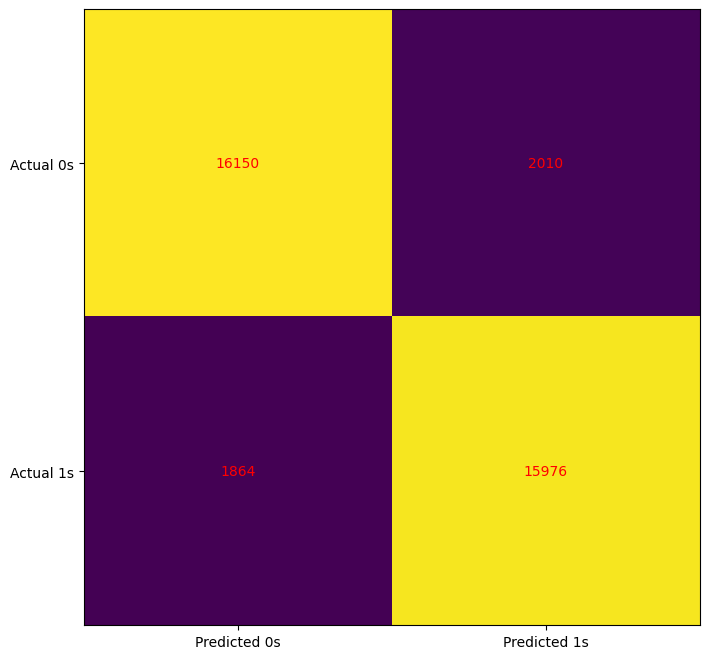

In [22]:
confusion_matrix_plot(y_test,y_predict)


In [24]:
y_test_list=y_test.tolist()
y_predict_list=y_predict.tolist()
test_list=test['Reviews_clean'].tolist()
rating_list=test['Ratings'].tolist()

In [25]:
from colorama import Fore, Back, Style
fn_dict={}
fp_dict={}
for i in range(0, len(y_test_list)):
    if ((y_test_list[i]=='0') & (y_predict_list[i]=='1')):
        fp_dict[i]=[test_list[i],rating_list[i]]
    elif((y_test_list[i]=='1') & (y_predict_list[i]=='0')):
        fn_dict[i]=[test_list[i],rating_list[i]]
    else:
        pass
    i+=1
for k,v in fp_dict.items():
    if v[1]<=2:
        print(Fore.RED +'False Positive: %s %s'%(k,v))
for k,v in fn_dict.items():
    if v[1]>=9:
        print(Fore.GREEN +'False Negative: %s %s'%(k,v))

False Positive: 15 ['good satire subtle scathing also helps immensely good satire funny mind choose watch film open mind retrospect touch ironic opening shiftless bum blow devil angel via soul well birther jibe movie subtlety brick face ok pj rourke not cut hour half later yes watched whole thing yes instantly regretted found not not laugh spent time dumbfounded inept movie interspersed numerous staged man streets interviews conservative libertarian rendered speechless ammo idiots say conservatives not funny needed site example example prove contrary point film forced say shucks got walk away', 2.0]
False Positive: 61 ['short non spoiler summary wake miscarriage problems couple moves los angeles troubled teenage daughter incredible deal get beautiful victorian home turns result past tragedies grounds house comes complete creepy intrusive neighbors mysterious housekeeper badness ensues categorize pilot american horror story unrelentingly unpleasant cynical fetishistic horror clearly fan

In [28]:
import shap

shap.initjs()

In [27]:
!pip install shap

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ------ --------------------------------- 4.5/28.1 MB 24.4 MB/s eta 0:00:01
   -------------- ------------------------- 10.0/28.1 MB 24.8 MB/s eta 0:00:01
   ------------------- -------------------- 13.9/28.1 MB 22.3 MB/s eta 0:00:01
   ------------------------- -------------- 18.1/28.1 MB 21.5 MB/s eta 0:00:01
   ------------------------------- -------- 22.0/28.1 MB 21.4 MB/s eta 0:00:01
   ------------------------------------- -- 26.2/28.1 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 28.1/28.1 MB 20.3 MB/s eta 0:00:00


In [30]:
explainer = shap.Explainer(model_1, x_train_tfidf, feature_names=tfidfvect.get_feature_names_out())
shap_values = explainer(x_test_tfidf)

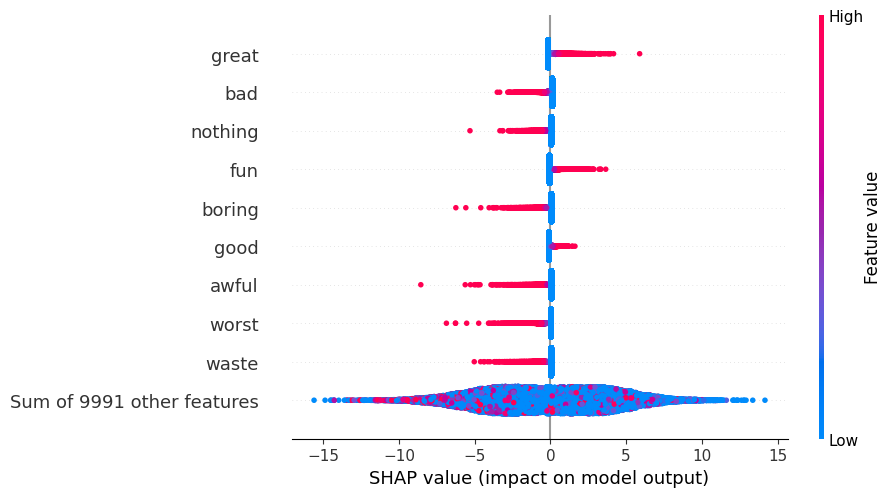

In [31]:
shap.plots.beeswarm(shap_values)


In [32]:
ind = 4443
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.438058479902013


In [33]:
y_test_list=y_test.tolist()
print("Positive" if y_test_list[ind] else "Negative", "Review:")
print(test_list[ind])

Positive Review:
sorry not find movie funny many scenes believe cause offense others justified basis rented dvd skip lot content view see overall vote currently others agree still remember scenes regret seeing think make fun group not feeling anyway humble view believe many minorities easily offended not recommend anyone sad thing movie many good actresses actors not understand took part


In [35]:
ind = 111
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.42700747779643333


In [36]:
y_test_list=y_test.tolist()
print("Positive" if y_test_list[ind] else "Negative", "Review:")
print(test_list[ind])

Positive Review:
movie joke seriously anyone right mind think intended applied real life fictional joke something used part religion movie taken context many l ron hubbard wrote fictional movies books different war worlds entertainment piece written intention making people think weird crazy fictional ideas not turned religious cult watch movie feel sorry take seriously intended fictional entertainment not instructional video live


In [37]:
ind = 7599
print('Probability Score %s' %y_predict_prob[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.3118766412887855


In [38]:
y_test_list=y_test.tolist()
print("Positive" if y_test_list[ind] else "Negative", "Review:")
print(test_list[ind])

Positive Review:
watched movie reading awful viewers plot little misunderstood people not get movie revolutionary innovative movie not made entertainment created sole purpose punishing mankind womankind ok sins outstanding job government utilize movie towards betterment society suggestion use drunk driving deterrent anybody get caught driving drunk punished forcing watch movie times safer roads time


In [39]:
idx=7599
output = model_2.predict([test_list[idx]])
print(output)

['0']


In [41]:
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------- -------------------------- 4.5/12.9 MB 24.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/12.9 MB 24.2 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 22.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 22.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=b8d6bb7170388b13850d6af8d71a857a9c4525ad1aac56b872bbd4e2fa600acf
  Stored in directory: c:\users\konde\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [42]:
from lime.lime_text import LimeTextExplainer
class_names = [0,1]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(test_list[idx], model_2.predict_proba, num_features = 100,top_labels=2)
print('New document id: %d' % idx)
print('Predicted Label =', model_2.predict([test_list[idx]]))
print('Predicted probabilites =', model_2.predict_proba([test_list[idx]]))
print('Actual Label: %s' % y_test_list[idx])
print(exp.available_labels())

New document id: 7599
Predicted Label = ['0']
Predicted probabilites = [[0.68812337 0.31187663]]
Actual Label: 1
[0, 1]


In [43]:
exp.show_in_notebook(text=True)


In [44]:
exp.as_list(label=1)


[('drunk', -0.28313370178861175),
 ('awful', -0.2304772789158945),
 ('revolutionary', 0.17006279860824355),
 ('sole', -0.15993144085814287),
 ('outstanding', 0.15260303679805212),
 ('driving', -0.13477978139992958),
 ('misunderstood', 0.09680657493391143),
 ('innovative', 0.08839144970995574),
 ('movie', 0.08586717073948223),
 ('entertainment', 0.08390233961216363),
 ('people', 0.0662979704499514),
 ('job', 0.05784142961876568),
 ('ok', -0.05698822966370814),
 ('made', -0.05684923234209475),
 ('watch', 0.05478814047298488),
 ('caught', 0.04674284276466745),
 ('government', 0.04389474936208059),
 ('use', -0.035298114391577054),
 ('sins', -0.028571615572790563),
 ('not', -0.02819972364201793),
 ('suggestion', -0.026993099163802065),
 ('reading', -0.022848618258518617),
 ('watched', 0.02099855726917925),
 ('anybody', -0.017339147762400114),
 ('little', 0.01669760751496736),
 ('plot', -0.014214154086564531),
 ('created', 0.014082491360754762),
 ('forcing', -0.013041709009985476),
 ('mankin

In [45]:
idx=111
exp = explainer.explain_instance(test_list[idx], model_2.predict_proba, num_features = 100,top_labels=2)
exp.show_in_notebook(text=True)

In [46]:
idx=24097
exp = explainer.explain_instance(test_list[idx], model_2.predict_proba, num_features = 100,top_labels=2)
exp.show_in_notebook(text=True)

In [ ]:
test=input()
exp = explainer.explain_instance(test, model_2.predict_proba, num_features = 100,top_labels=2)
exp.show_in_notebook(text=True)
